In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the train_test_split functionality from sklearn
from sklearn.model_selection import train_test_split

## Read diabetes_dirty.csv into your Jupyter Notebook.

In [2]:
# Import the dataset
df = pd.read_csv("diabetes_dirty.csv")

In [3]:
#BASIC CHECKS#

#check no of rows and columns
print(f"\nSize of rows/columns: {df.shape}\n")

#check details of the dataset
print(df.info(),"\n")

#checking for null values
print(f"\nChecking for if there are null values: \n{df.isnull().sum()}")

# Check the 1st 5 values in the dataset
print(f"\nChecking the first 5 Rows and all columns of data: \n{df.head()}\n")

df.describe()


Size of rows/columns: (442, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None 


Checking for if there are null values: 
AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

Checking the fi

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Observations:
1 - There are 442 rows and 11 columns in this dataset
2 - There are no null values in the dataset
3 - There are no obvious errors at first glance
4 - All the data is numerical with Integers and floats

## Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.

Independent Variables: 
1. Age
2. Sex
3. BMI
4. BP
5. S1
6. S2
7. S3
8. S4
9. S5
10. S6

Dependent Variables: 
1. Progression

In [4]:
#Seperated the Data into X and y for futher processing

#all the Independent Columns values are stored in X
X = df.drop('PROGRESSION', axis=1).values

#the depend column PROGRESSION values is stored in y
y = df['PROGRESSION'].values
#Checking data is getting stored properly in x
X[:4]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ],
       [ 72.    ,   2.    ,  30.5   ,  93.    , 156.    ,  93.6   ,
         41.    ,   4.    ,   4.6728,  85.    ],
       [ 24.    ,   1.    ,  25.3   ,  84.    , 198.    , 131.4   ,
         40.    ,   5.    ,   4.8903,  89.    ]])

## Generate training and test sets comprising 80% and 20% of the data respectively.

In [25]:
# Select and reshape data
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

print ("Data:",X.shape, y.shape)

#TRAINING AND TESTS

# Split data into training and test sets
rseed = 89 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state=rseed)

#Checking dataframe integrety as a summary
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)
#confirming data has been split 
#print (X_train)

Data: (442, 10) (442, 1)
Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


## Investigate the necessity for scaling or normalization of the data. Employ MinMaxScaler and StandardScaler if necessary. Fit these scalers on the training set and apply the fitted scalers to transform both the training and test sets accordingly.



 Plotting the distribution of the data<seaborn.axisgrid.PairGrid object at 0x000002B2BFFECF50>




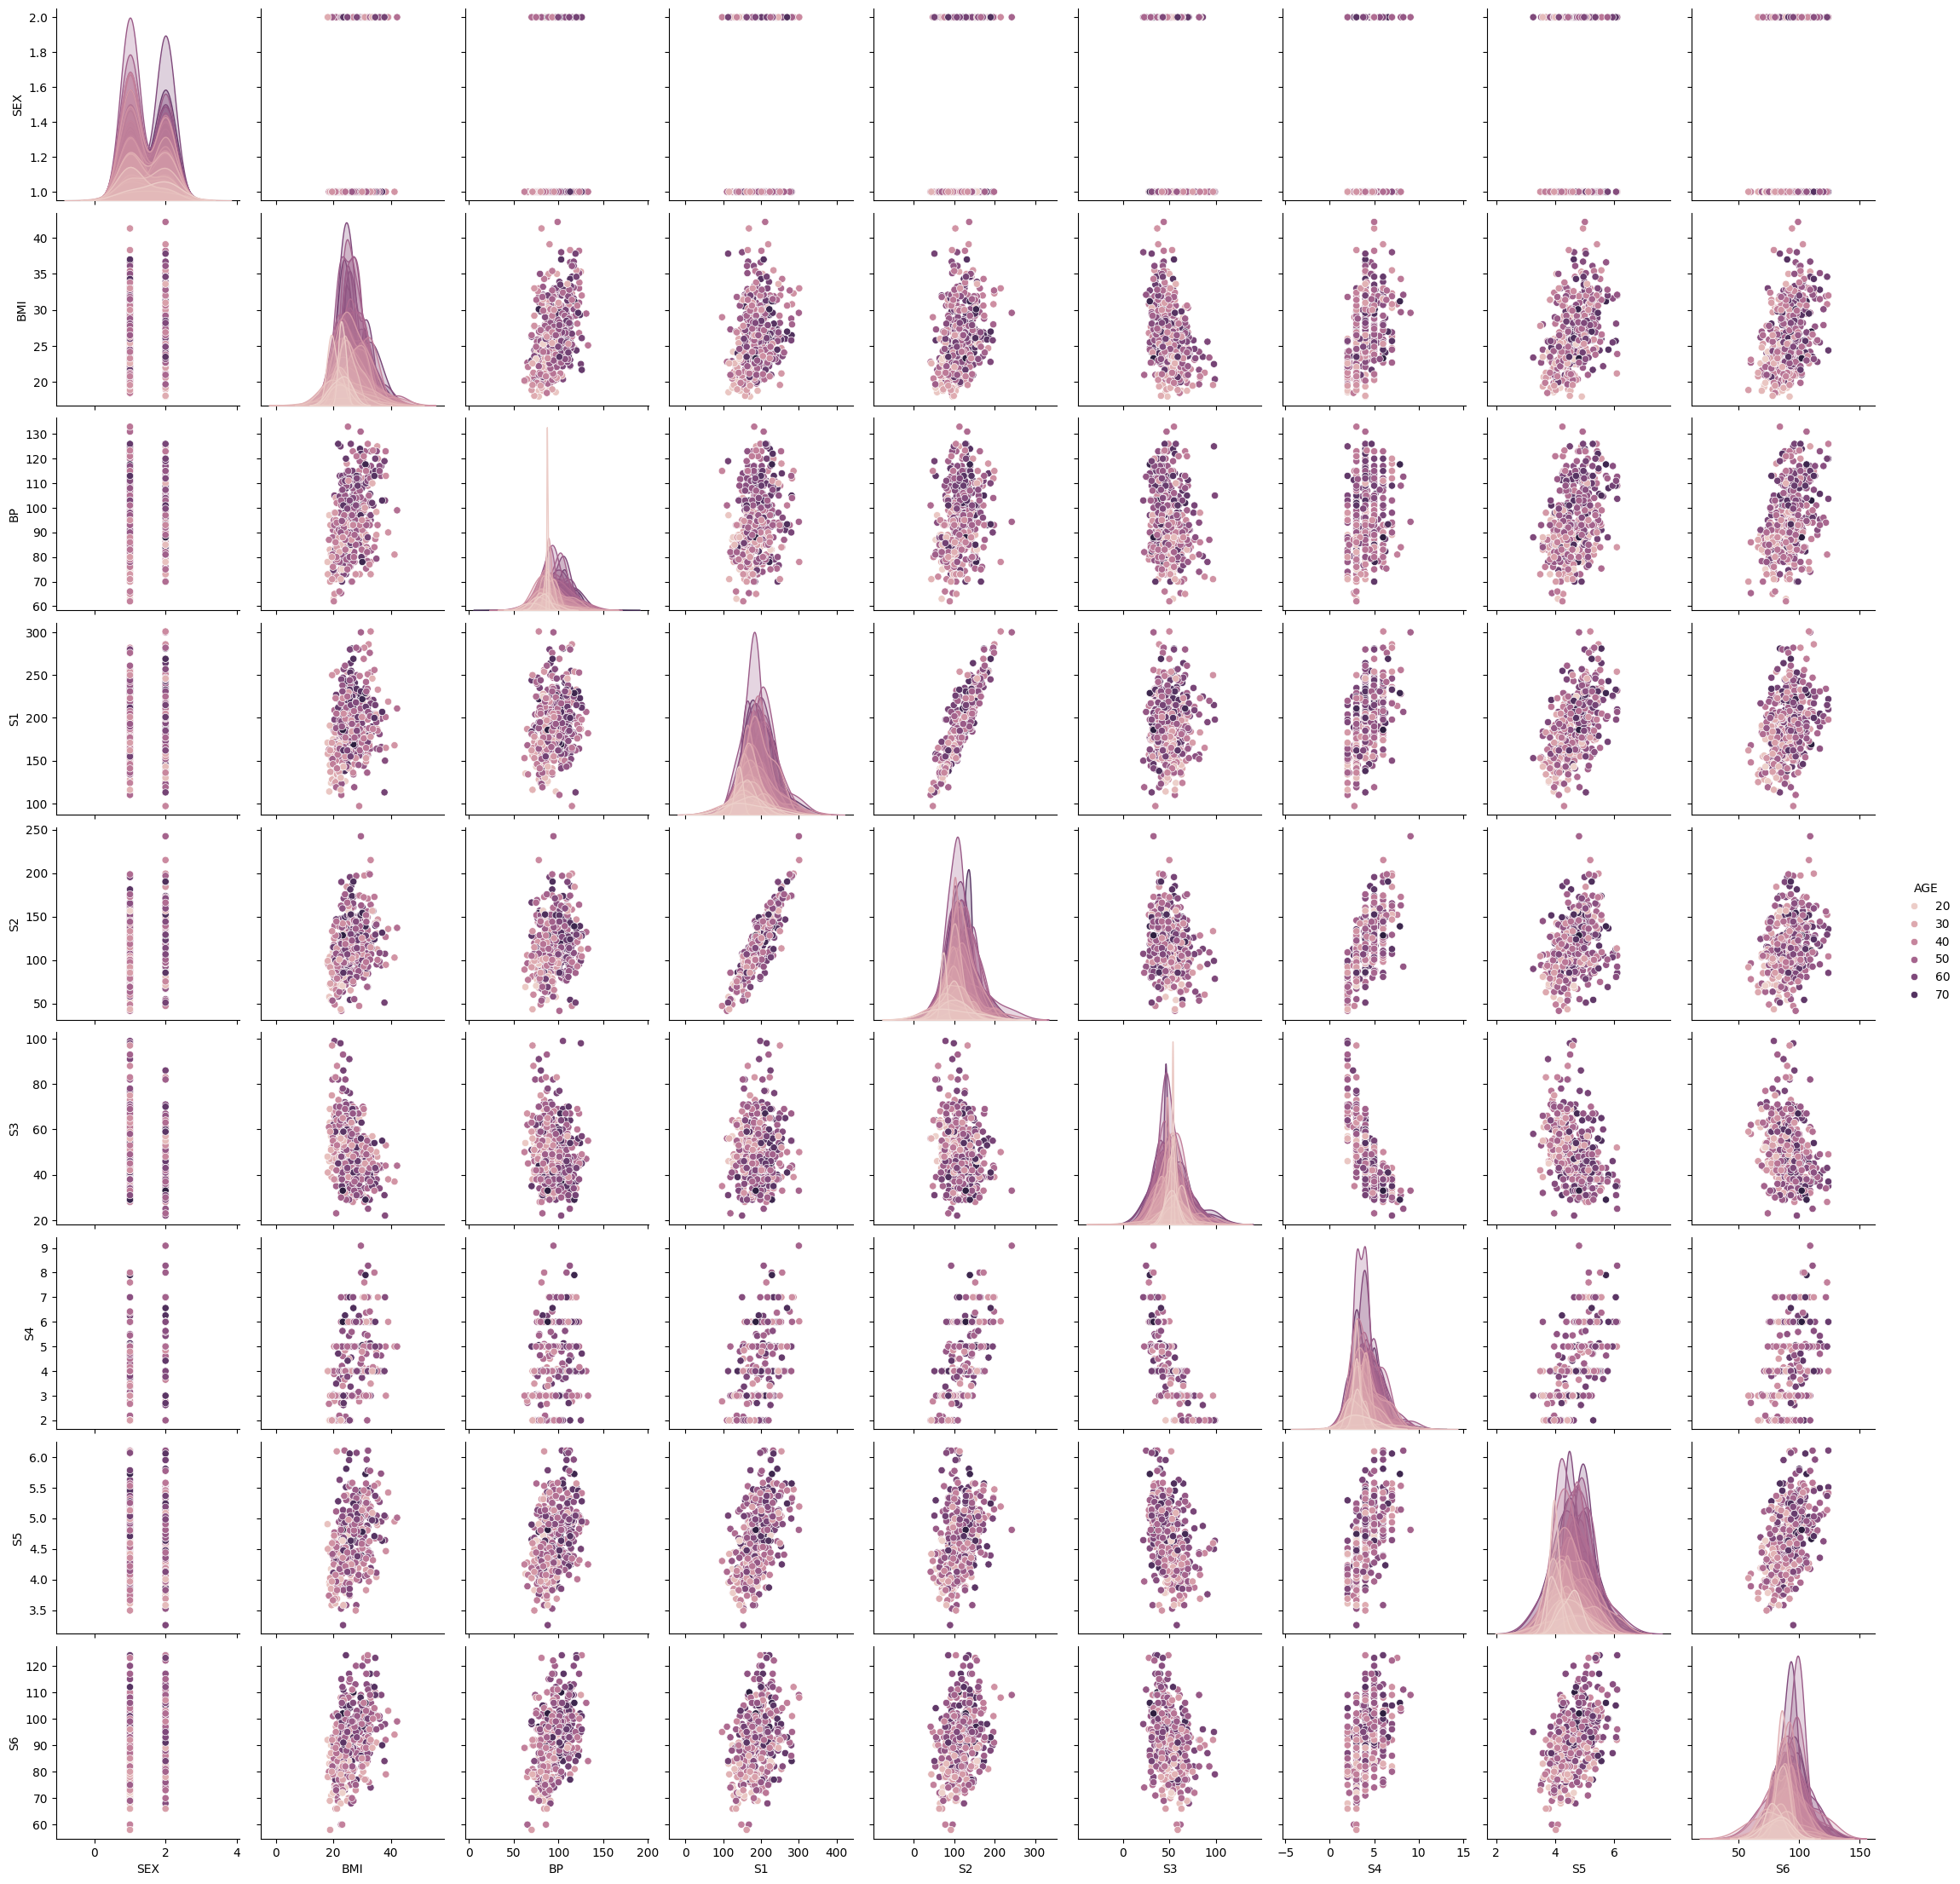

In [6]:
# Plot the distribution of the data
print(f"\n\n Plotting the distribution of the data{sns.pairplot(data=df.drop('PROGRESSION', axis=1), hue="AGE")}\n\n" )

Looking at the data above, we would have been better changing the scaling method, like the Min max scaler to get the values in between 0 and 1

## Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [38]:
from sklearn.preprocessing import StandardScaler
# Fit the scaler on train data
#fs = StandardScaler()
fs = MinMaxScaler()
fs.fit(X_train)

# Apply the scaler on train and test data
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

# Fit a model
lr = LinearRegression()
model = lr.fit(X_train, y_train)


print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


## Print out the intercept and coefficients of the trained model.

In [39]:
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 [-12.33166022]
Coefficients: 
 [[  -5.03467625  -24.19341692  137.53487743   78.97541747 -184.24417384
   106.5061069    34.91818022   67.98359357  177.06148123   23.82789348]]


## Generate predictions for the test set.

In [40]:
# Predictions
predictions = lr.predict(X_test)
print('Predictions: \n', predictions[0:5]) 

Predictions: 
 [[145.1100006 ]
 [147.8654027 ]
 [176.26625713]
 [169.04010379]
 [233.55229917]]


## Compute R-squared for your model on the test set. You can use r2_score from sklearn.metrics to obtain this score

In [41]:
# R squared score
from sklearn.metrics import r2_score

print ("R2 Score:", r2_score(y_test, predictions))

R2 Score: 0.5153684277220154


Since the R2 score is between 0-1 it seems to be within the range of accepted error margin and a good fit for the model